In [2]:
import pandas as pd
from sklearn import datasets

# Memuat dataset Iris dari scikit-learn
iris = datasets.load_iris()

X = iris.data    # inputan untuk machine learning
y = iris.target  # output yang dinginkan dari machine learning

# Mengonversi data fitur dan target menjadi DataFrame
df_X = pd.DataFrame(X, columns=iris.feature_names)
df_y = pd.Series(y, name='target')


In [3]:
df_X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
df_y



,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [5]:
# Gabungkan fitur dan target dalam satu DataFrame
df = pd.concat([df_X, df_y], axis=1)

df.head(10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
df['target'].unique()

array([0, 1, 2])

In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# 2. Split Data

In [10]:
from sklearn.model_selection import train_test_split
# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
round(150*0.2)

30

In [12]:
round(150*0.8)

120

# 3a. Train the Model Naive Bayes

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
# Inisialisasi dan latih model Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Prediksi menggunakan Naïve Bayes
y_pred_nb = nb_model.predict(X_test)

# Evaluasi model Naïve Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy Naïve Bayes: {accuracy_nb:.2f}")

Accuracy Naïve Bayes: 1.00


Text(0.5, 1.0, 'Confusion Matrix - Naïve Bayes')

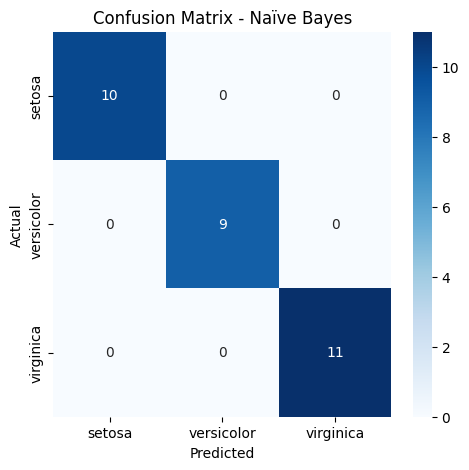

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Memuat dataset Iris
# Membuat confusion matrix untuk kedua model
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Plot Confusion Matrix untuk Naïve Bayes
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naïve Bayes")

In [20]:
from sklearn.ensemble import RandomForestClassifier
# Inisialisasi dan latih model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi menggunakan Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Random Forest: {accuracy_rf:.2f}")

Accuracy Random Forest: 1.00


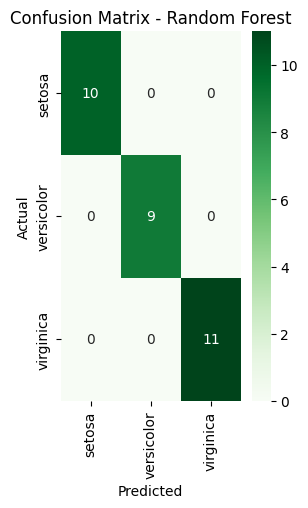

In [22]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
# Plot Confusion Matrix untuk Random Forest
plt.subplot(1, 2, 2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")

plt.show()

In [25]:
if accuracy_rf > accuracy_nb:
    print("🎯 Model Random Forest lebih akurat dibandingkan Naïve Bayes.")
elif accuracy_nb > accuracy_rf:
    print("🎯 Model Naïve Bayes lebih akurat dibandingkan Random Forest.")
else:
    print("🎯 Kedua model memiliki akurasi yang sama.")

🎯 Kedua model memiliki akurasi yang sama.
